In [1]:
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.ticker as mticker
import os
import numpy as np

In [2]:
#Read in CSV and manipulate to pull only data we will be working with
main=pd.read_csv('IcelandData.csv', header=4)
main.drop(['Country Name','Country Code','Indicator Code'],inplace=True, axis=1)
main=main.iloc[[15,60,146, 396,392,513,645,813,821,824,829,833]]
main.set_index('Indicator Name', inplace=True)
main.to_csv('condensedata.csv', index=True, header=True)
main=main.transpose()
main

Indicator Name,GDP per person employed (constant 2011 PPP $),Trade (% of GDP),Manufactures exports (% of merchandise exports),Taxes on international trade (% of revenue),Tax revenue (% of GDP),Surface area (sq. km),Net lending (+) / net borrowing (-) (% of GDP),Gross domestic savings (% of GDP),GDP per capita growth (annual %),GDP per capita (current US$),GDP growth (annual %),GDP (current US$)
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1414.982269,NaN,2.484341e+08
1961,NaN,NaN,NaN,NaN,NaN,103000.0,NaN,NaN,-2.012883,1418.125870,-0.084662,2.538857e+08
1962,NaN,NaN,1.210346,NaN,NaN,103000.0,NaN,NaN,6.324752,1562.230730,8.313713,2.849165e+08
1963,NaN,NaN,1.710342,NaN,NaN,103000.0,NaN,NaN,8.337936,1831.705656,10.283383,3.400617e+08
1964,NaN,NaN,1.857268,NaN,NaN,103000.0,NaN,NaN,7.979745,2297.920643,9.916544,4.342679e+08
1965,NaN,NaN,1.663195,NaN,NaN,103000.0,NaN,NaN,5.527347,2723.520950,7.371729,5.236949e+08
1966,NaN,NaN,3.230977,NaN,NaN,103000.0,NaN,NaN,6.910046,3215.694178,8.735933,6.288933e+08
1967,NaN,NaN,3.519278,NaN,NaN,103000.0,NaN,NaN,-2.847474,3125.649492,-1.267262,6.212260e+08
1968,NaN,NaN,2.505313,NaN,NaN,103000.0,NaN,NaN,-6.758929,2354.480027,-5.474906,4.743995e+08
1969,NaN,NaN,4.352084,NaN,NaN,103000.0,NaN,NaN,1.427705,2039.196295,2.374588,4.147093e+08


In [22]:
#read the data in
data = pd.read_csv("condensedata.csv").T

#keep only the columns I'm working on
data = data[[3,4,5]]

#drop the first row with column names
data = data.drop(data.index[0])

#reset the index so it's easier to get the year
data = data.reset_index()

#rename the columns to something easier to understand
data.columns = ["Year","Tax on Int Trade","Tax Revenue","Surface Area"]

#drop empty data fields
#data = data.dropna()

# #check out the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
Year                60 non-null object
Tax on Int Trade    47 non-null object
Tax Revenue         47 non-null object
Surface Area        58 non-null object
dtypes: object(4)
memory usage: 2.0+ KB


In [23]:
quakes = pd.read_csv("earthquakedata.csv")
quakestime = pd.DataFrame(quakes)
quakestime["Time"] = pd.to_datetime(quakestime["Time"],unit='ms')
quakestime = pd.DataFrame(quakestime)
quakestime["Time"] = quakestime["Time"].astype("str")
quakestime["Year"] = pd.DatetimeIndex(quakestime["Time"]).year
quakestime = quakestime[["Year","Magnitude"]]
maxquake = quakestime.groupby("Year")
maxquake = maxquake.max()
maxquake = maxquake.reset_index()
maxquake = maxquake[(maxquake["Year"] > 1960) & (maxquake["Year"]<2019)]
maxquake = maxquake[maxquake["Magnitude"]>6]
maxquake["Year"] = maxquake["Year"].astype(str)
all_data = pd.merge(data,maxquake,on="Year", how="left")
all_data

,Year,Tax on Int Trade,Tax Revenue,Surface Area,Magnitude
0,1960,NaN,NaN,NaN,NaN
1,1961,NaN,NaN,103000,NaN
2,1962,NaN,NaN,103000,NaN
3,1963,NaN,NaN,103000,6.9
4,1964,NaN,NaN,103000,NaN
5,1965,NaN,NaN,103000,NaN
6,1966,NaN,NaN,103000,NaN
7,1967,NaN,NaN,103000,NaN
8,1968,NaN,NaN,103000,NaN
9,1969,NaN,NaN,103000,NaN


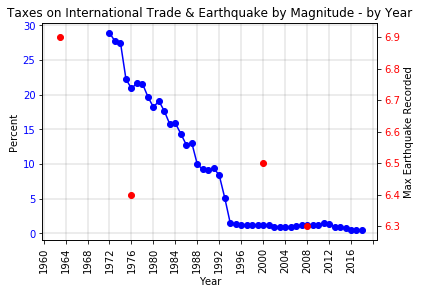

In [31]:
y = all_data["Tax on Int Trade"]
x = all_data["Year"]
y2 = all_data["Magnitude"]
tick_locations = [value for value in x]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Percent")
ax1.set_xlabel("Year")
ax1.plot(x, y, marker="o", color="blue")
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.set_ylabel("Max Earthquake Recorded")
ax2.scatter(x,y2, color="r")
ax2.tick_params(axis = 'y', labelcolor = 'red')
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.title("Taxes on International Trade & Earthquake by Magnitude - by Year")
plt.show()

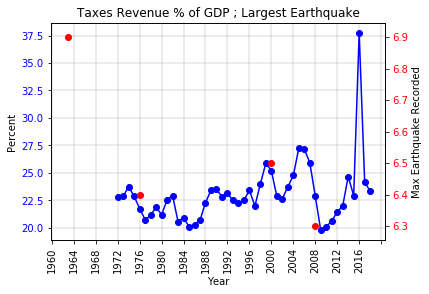

In [30]:
y = all_data["Tax Revenue"]
x = all_data["Year"]
y2 = all_data["Magnitude"]
tick_locations = [value for value in x]
fig, ax1 = plt.subplots()
ax1.set_xlabel("Year")
ax1.set_ylabel("Percent")
ax1.plot(x, y, color="blue",marker="o")
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.set_ylabel("Max Earthquake Recorded")
ax2.scatter(x,y2,color="red", marker="o")
ax2.tick_params(axis = 'y', labelcolor = 'red')
ax1.set_title("Taxes Revenue % of GDP ; Largest Earthquake")
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.show()

In [32]:
#Get angie's data columns and merge with the quakes above 6.1 dataframe

angies = pd.read_csv("condensedata.csv").T
angies = angies[[6,7,8]]
angies = angies.drop(angies.index[0])
angies = angies.reset_index()

angies.columns = ["Year","Lending/Borrowing","Domestic Savings","GDP/capita growth"]

#merge the earthquakes above 6.1 with a left join
angies_columns = pd.merge(angies, maxquake, on="Year", how='left')


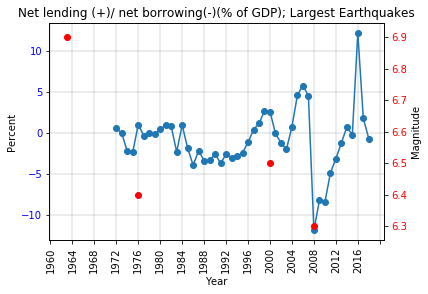

In [33]:
#Plot both the Net Lending/Net Borrowing and the earthquake on the same figure using twinx()

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Percent")
ax1.plot(angies_columns['Year'], angies_columns['Lending/Borrowing'], marker='o')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax1.set_title('Net lending (+)/ net borrowing(-)(% of GDP); Largest Earthquakes')

ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(angies_columns['Year'], angies_columns["Magnitude"], marker="o", color='red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.savefig('Output_Data/Netlendingborrowing')
plt.show()

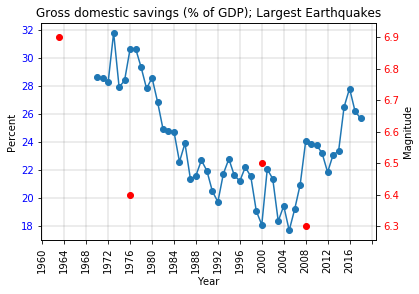

In [34]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Percent")
ax1.plot(angies_columns['Year'], angies_columns['Domestic Savings'], marker='o')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax1.set_title('Gross domestic savings (% of GDP); Largest Earthquakes')

ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(angies_columns['Year'], angies_columns["Magnitude"], marker="o", color='red')

ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.savefig('Output_Data/DomesticSavings')
plt.show()

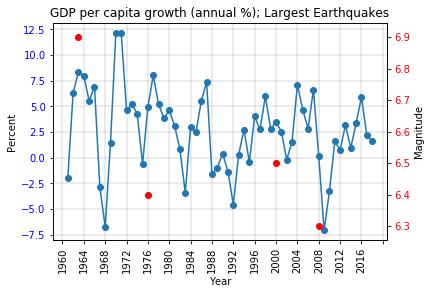

In [35]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Percent")
ax1.plot(angies_columns['Year'], angies_columns['GDP/capita growth'], marker='o', )
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax1.set_title('GDP per capita growth (annual %); Largest Earthquakes')
ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(angies_columns['Year'], angies_columns["Magnitude"], marker="o", color='red')

ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.savefig('Output_Data/GDPpercapitagrowth')
plt.show()

In [36]:
df = "condensedata.csv"

world_bank = pd.read_csv(df, index_col=0)
world_bank = world_bank.T

kenn_df = world_bank[["GDP per capita (current US$)", "GDP growth (annual %)", "GDP (current US$)"]]
kenn_df = kenn_df.reset_index()

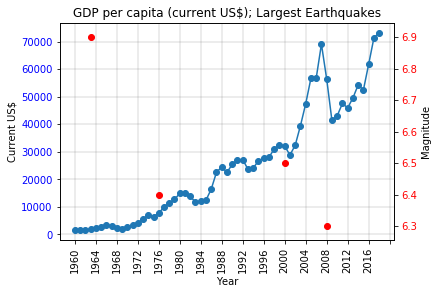

In [37]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Current US$")
ax1.plot(kenn_df['index'], kenn_df['GDP per capita (current US$)'], marker='o', )
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax1.set_title('GDP per capita (current US$); Largest Earthquakes')
ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(angies_columns['Year'], angies_columns["Magnitude"], marker="o", color='red')

ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.savefig('Output_Data/GDPperCapita')
plt.show()

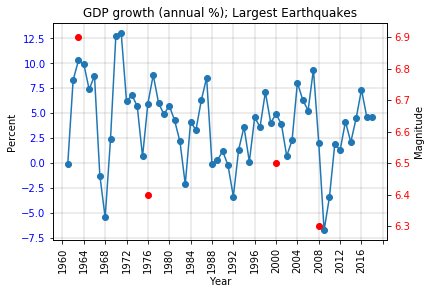

In [38]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Percent")
ax1.plot(kenn_df['index'], kenn_df['GDP growth (annual %)'], marker='o', )
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax1.set_title('GDP growth (annual %); Largest Earthquakes')
ax2 = ax1.twinx()
ax2.set_ylabel("Magnitude")
ax2.scatter(angies_columns['Year'], angies_columns["Magnitude"], marker="o", color='red')

ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.savefig('Output_Data/GDPGrowthPercent')
plt.show()

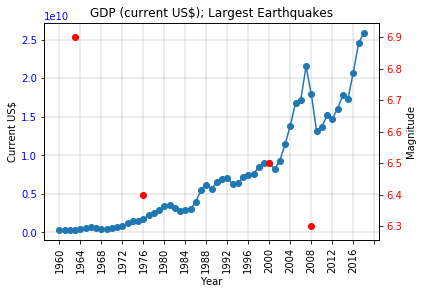

In [39]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Current US$")
ax1.plot(kenn_df['index'], kenn_df['GDP (current US$)'], marker='o', )
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax1.set_title('GDP (current US$); Largest Earthquakes')
ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(angies_columns['Year'], angies_columns["Magnitude"], marker="o", color='red')

ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.savefig('Output_Data/GDPCurrentUSDollars')
plt.show()

In [40]:
brett = pd.read_csv("condensedata.csv").T
brett = brett[[0,1,2]]
brett = brett.drop(brett.index[0])
brett= brett.reset_index()

brett.columns = ["Year","GDPEmployed","Trade%","ManuExport"]

#merge the earthquakes above 6.1 with a left join
brett_columns = pd.merge(brett, maxquake, on="Year", how='left')



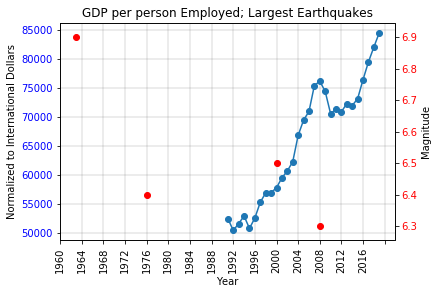

In [41]:
#Plot GDP per person emoloyed by year
# GDP per person employed is gross domestic product (GDP) divided by total employment 
#in the economy. Purchasing power parity (PPP) GDP is GDP converted to 2011 constant 
#international dollars using PPP rates.

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_title('GDP per person Employed; Largest Earthquakes')
ax1.set_ylabel("Normalized to International Dollars")
ax1.plot(brett_columns['Year'], brett_columns['GDPEmployed'], marker='o')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax1.grid(linestyle='-', linewidth='0.3', color='grey')

ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(brett_columns['Year'], brett_columns["Magnitude"], marker="o", color='red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.savefig('Output_Data/GDPEmployed')
plt.show()

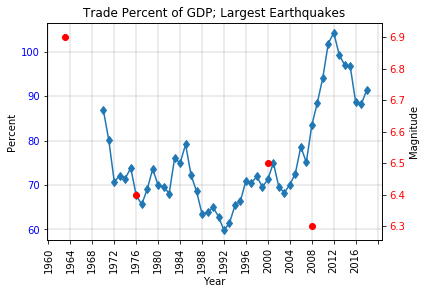

In [42]:
#plot trade (% of GDP)
#The trade-to-GDP ratio is an indicator of the relative importance of international trade 
#in the economy of a country. It is calculated by dividing the aggregate value of imports 
#and exports over a period by the gross domestic product for the same period. Although called 
#a ratio, it is usually expressed as a percentage.

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Percent")
ax1.set_title('Trade Percent of GDP; Largest Earthquakes')
ax1.plot(brett_columns['Year'], brett_columns['Trade%'], marker='d')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(brett_columns['Year'], brett_columns["Magnitude"], marker="o", color='red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.savefig('Output_Data/Trade%GDP')
plt.show()

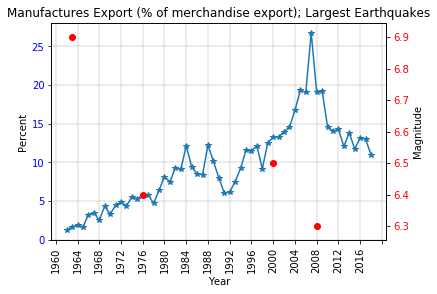

In [43]:
#plot manufactures exports (% of merchandise export)
#The share of manufactures exports in the merchandise exports of the country, expressed in percentage.
#Manufactures comprise commodities in SITC sections 5 (chemicals), 6 (basic manufactures), 
#7 (machinery and transport equipment), and 8 (miscellaneous manufactured goods), excluding
#division 68 (non-ferrous metals).
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Percent")
ax1.set_title('Manufactures Export (% of merchandise export); Largest Earthquakes')
ax1.plot(brett_columns['Year'], brett_columns['ManuExport'], marker='*')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)
ax1.grid(linestyle='-', linewidth='0.3', color='grey')
ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(brett_columns['Year'], brett_columns["Magnitude"], marker="o", color='red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.savefig('Output_Data/ManuExport')
plt.show()